In [68]:
#W12D8 -ESAME FINALE - VERRECCHIA ISABELLA

In [69]:
#Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo;
#scaricare il dataset nel formato che si preferisce.
!pip install numpy
import numpy as np
import pandas as pd

covid = pd.read_csv("owid-covid-data.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [70]:
#ESERCIZIO 1:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati
covid.shape
#con l'utilizzo di shape si ottiene il numero di righe e colonne del dataframe 

(429435, 67)

In [71]:
covid.size
#con size di ottiene la dimensione totale del dataframe (righe x colonne)

28772145

In [72]:
covid.info()
#con il metodo info si ottiene una panoramica del dataframe (metadati):totale righe e colonne, nomi delle colonne, eventuali valori nulli, 
#i tipi di dato di ogni colonna e anche la memoria che occupata il dataframe nella RAM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [73]:
#ESERCIZIO 2: Si chiede di trovare, per ogni continente:
#a. il numero di casi fin dall'inizio della pandemia
#b. la percentuale rispetto al totale mondiale del numero di casi

In [74]:
#PUNTO A: numero dei casi per continente
casi = covid.groupby(["continent", "location"])["total_cases"].max().groupby("continent").sum()
casi
#per fare questo calcolo ho raggruppato sia per continente che per stato, essendoci nella colonna location anche dati aggregati 
#(osservando le due colonne mi sono resa conto che, in alcuni record in cui il valore del continente era vuoto, nella corrispondente
#colonna dello stato c'era invece il riferimento al continente). 
#dopo il primo raggruppamento ho calcolato il massimo dei casi totali (poichè la colonna total_cases ha valori aggregati: per ogni 
#giorno vengono indicati i casi giornalieri + la somma di tutti i casi dei giorni precedenti). 
#infine ho fatto un altro raggruppamento per continente e fatto la somma

continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

In [75]:
# PUNTO B: percentuale di casi 
#Prima di tutto calcolo il totale di casi nel mondo
totale = covid["total_cases"].max()
totale
#ho usato la logia simile all'esercizio precedente. Essendo total_cases valori aggregati nel tempo, estraendo il valore massimo ho 
#ottenuto il totale dei casi mondiali

775866783.0

In [76]:
# percentuale
percentuali = (casi/totale)*100
percentuali

continent
Africa            1.694304
Asia             38.863933
Europe           32.597976
North America    16.045624
Oceania           1.933754
South America     8.868716
Name: total_cases, dtype: float64

In [77]:
#per avere un output più "parlante" ho usato un cilo for per aggiungere il simbolo % ai valori calcolati in precedenza, e ho arrotondato
#i risultati a 2 cifre decimali
for continent,percent in percentuali.items():
    print(f"{continent} : {round(percent,2)} %") 

Africa : 1.69 %
Asia : 38.86 %
Europe : 32.6 %
North America : 16.05 %
Oceania : 1.93 %
South America : 8.87 %


In [78]:
#ESERCIZIO 3: Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via 
#i giorni che non hanno misurazioni; 
filtrod = covid["date"].str.contains("2022")  #filtro per estrarre le sole date relative al 2022
filtrol = covid["location"] == "Italy"  # filtro per estrarre solo l'Italia
filtro0 = covid["new_cases"] != 0     #filtro per escludere le righe dei nuovi casi con valore 0
filtro = filtrod & filtrol & filtro0   # filtro per unire tutti i filtri 
italia22 = covid.loc[filtro]      #estraggo solo le righe che soddisfano le condizioni del filtro
italia22

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178007.39,12.72,3.66,3015.1594
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472,178015.30,12.60,0.06,3015.2935
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178133.80,12.48,0.86,3017.3005


In [79]:
#CONTINUO ESERC. 3: quindi mostrare con dei grafici adeguati:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
#b. il numero di nuovi casi rispetto alla data

<Axes: title={'center': "Evoluzione del covid in Italia nell'anno 2022"}, xlabel='date'>

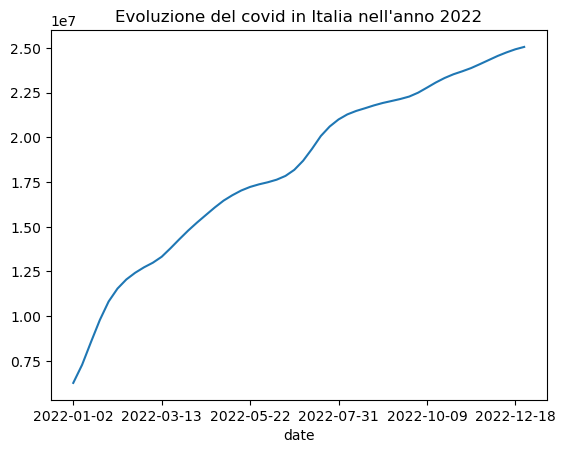

In [80]:
#PUNTO A: evoluzione dei casi totali da inizio a fine anno
covid["date"] = pd.to_datetime(covid["date"], yearfirst = True)
# in questo caso, per avere la data sull'asse delle x, ho dovuto trasformare la colonna date in formato data, perchè era una stringa
italia22 = italia22.set_index("date")
italia22["total_cases"].plot(title= "Evoluzione del covid in Italia nell'anno 2022")


<Axes: title={'center': 'Andamento nuovi casi in Italia nel 2022'}, xlabel='date'>

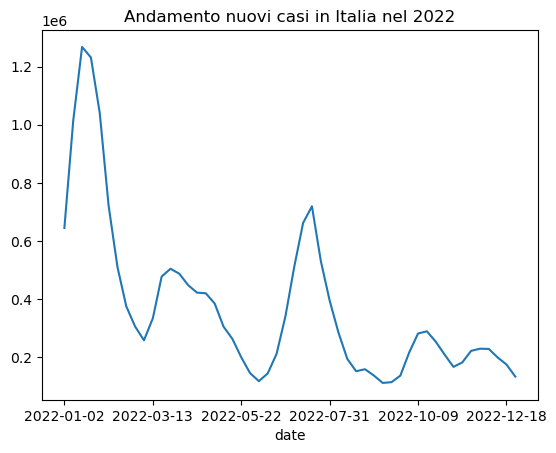

In [88]:
#PUNTO B: il numero di nuovi casi rispetto alla data
import seaborn as sns
import matplotlib.pyplot as plt

italia22["new_cases"].plot(title = "Andamento nuovi casi in Italia nel 2022" )


In [82]:
#ESERCIZIO 4: Riguardo le nazioni di Italia, Germania e Francia:
#mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU,
#considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

#devo selezionare solo i 3 paesi indicati: faccio più filtri per selezionare il singolo paese
filtroi = covid["location"] == "Italy"
filtrog = covid["location"] == "Germany"
filtrof = covid["location"] == "France"
inizio = '2022-05-01'
fine = '2023-04-30'
filtrod = covid["date"].between(inizio, fine) #estraggo il periodo richiesto con la funzione between 
filtro = (filtroi | filtrog | filtrof) & filtrod
nazioni = covid.loc[filtro]


Text(0.5, 1.0, 'Numero pazienti in terapia intensiva per paese')

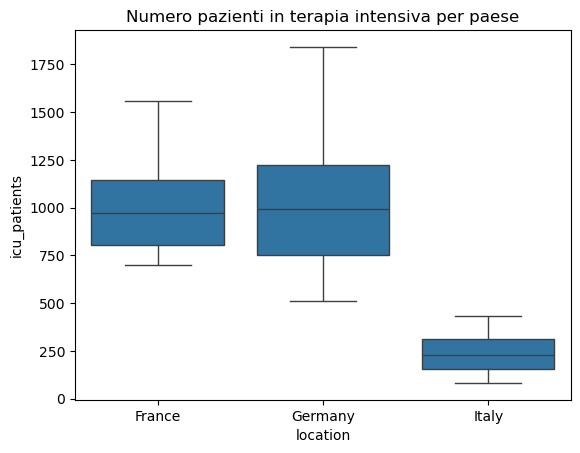

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = nazioni, x="location", y="icu_patients")
plt.title("Numero pazienti in terapia intensiva per paese")

In [84]:
#scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante:

#Osservando il grafico relativo al boxplot la prima cosa che salta all'occhio è che il numero di pazienti in terapia intensiva in 
#Italia è molto più basso rispetto alla Francia e alla Germania, che hanno invece un range abbastanza simile (Germania leggermente più
#ampio). 
#Tutte e 3 le distribuzioni sono mediamente concentrate intorno alla mediana e non sono presenti outliers. 
#Per quanto riguarda la lunghezza dei baffi, che indica la dispersione dei dati rispetto alla scatola, la Germania in particolare (ma 
#anche la Francia in misura #minore) ha il baffo superiore più lungo di quello inferiore, e questo indica una distribuzione asimmetrica
#positiva, verso valori alti (ci sono numeri di pazienti in terapia intensiva molto più alti rispetto al valore mediano).

In [85]:
#ESERCIZIO 5: Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
#a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
#b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

#PUNTO A: 
#uso i filtri definiti in precedenza e  aggiungo quelli mancanti,
filtroda = covid["date"].between("2021-01-01","2021-12-31") #filtro per nuovo anno considerato
filtros = covid["location"] == "Spain"  #filtro per selezionare la spagna
filtro = (filtroi | filtrog | filtrof | filtros) & filtroda
cov_filtrato = covid.loc[filtro].groupby("location")["hosp_patients"].sum() 
print("La somma dei pazienti ospitalizzati nel 2021 per le nazioni selezionate è: \n", cov_filtrato)

La somma dei pazienti ospitalizzati nel 2021 per le nazioni selezionate è: 
 location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


In [86]:
#Faccio anche un grafico per avere una rappresentazione visiva dei risultati
#trasformo la serie in dataframe, per poter fare poi un grafico 
cov_prova = cov_filtrato.reset_index()
cov_prova.columns = ["location", "hosp_patients"] 

Text(0.5, 1.0, 'Totale pazienti ospedalizzati per paese')

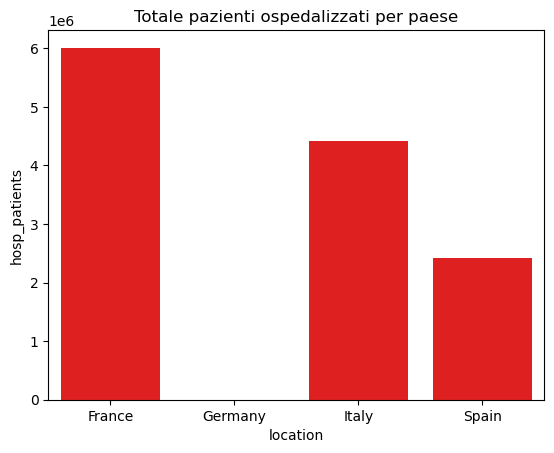

In [60]:
sns.barplot(x = "location", y = "hosp_patients", data = cov_prova, color = "red")
plt.title("Totale pazienti ospedalizzati per paese")         

In [ ]:
#PUNTO A:
#In merito ai dati nulli si osserva, sia dal risultato numerico che dalla rappresentazione grafica, l'assenza di dati sui pazienti
# ospitalizzati in Germania (per tutto il 2021 il valore è 0). 
#In questo caso specifico ritengo che non abbia senso sostituirli con altri valori, perchè manca un intero anno (se fosse mancato solo 
#il dato in qualche riga avrei probabilmente agito in maniere diversa, ad esempio sostituendo con valore medio oppure eliminando i record).
#Perciò quello che potrei fare è cercare di reperire, se possibile, questi dati mancanti, magari da un altro dataframe, e fare il merge 
#con quello usato per integrare i dati.